# EDA, FE and  Support Vector Regression(SVR) model 

## (Graduate-Admission-Prediction Dataset)


*GitHub* : https://github.com/raviteja-padala/Machine-Learning-Algorithms

*Dataset*:  "https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv"

*About the Data set*: The dataset contains several parameters which are considered important during the application for Graduate admission into master Programs in the universities. 

The dataset describes how the parameters like GRE Scores, TOEFL Scores, University Rating, Statement of Purpose, Letter of Recommendation Strength, Undergraduate GPA, Research Experience   can effect the Chance of Admit which is the target variable. 

**Problem Statement**
To build a model to predict the *Chance of Admit* into universities based on various qualification parameters in the dataset using Support Vector Regression(SVR) model.


*What is SVR in SVM(Support Vector Machines)?* 

Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points. SVR tries to fit the best line within a threshold value. The threshold value is the distance between the hyperplane and boundary line.


1. Exploratory Data Analysis and Feature Engineering

* Data Description
* Data Exploration
* Stastical analysis
* Graphical Analysis
* Data Encoding
* Data Scaling

2. Support Vector Regression

* Support Vector Regression
* Standardize Data
* Performance metrics for above models
* Increasing performance of model (Hyper-parameter Tuning)
* Creating Classification version of target variable and its performance metrics


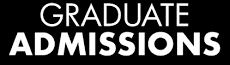

In [66]:
#importing libraries
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score

In [3]:
#import dataset
dataset=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")
dataset.drop('Serial No.',axis=1, inplace=True)

In [4]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [8]:
dataset.shape

(500, 8)

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


* Dataset details: 

The features in the dataset are :

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. SOP - Statement of Purpose ( out of 5 )
5. LOR - Letter of Recommendation Strength ( out of 5 )
6. Undergraduate GPA ( out of 10 )
7. Research Experience ( either 0 or 1 )


8. Chance of Admit ( ranging from 0 to 1 ) is the Target Variable


The dataset contains 8 columns and 500 rows.

In [9]:
#checking null values
dataset.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
# here it is visible that some columns have spaces in the names like LOR, Chance of admit
# stripping spaces from column names
dataset.columns = [fea.strip() for fea in dataset.columns]
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [17]:
#determine the number of unique categories in each variable:

dataset.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [16]:
#uNIQUE VALUES IN FEATURES
for feature in dataset.columns:
    print("'{}' has '{}' No. of unique values".format(feature, dataset[feature].nunique()))

'GRE Score' has '49' No. of unique values
'TOEFL Score' has '29' No. of unique values
'University Rating' has '5' No. of unique values
'SOP' has '9' No. of unique values
'LOR' has '9' No. of unique values
'CGPA' has '184' No. of unique values
'Research' has '2' No. of unique values
'Chance of Admit' has '61' No. of unique values


In [23]:
dataset.describe().T.style.background_gradient(cmap='BuGn').set_precision(6)

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.000000,316.472000,11.295148,290.000000,308.000000,317.000000,325.000000,340.000000
TOEFL Score,500.000000,107.192000,6.081868,92.000000,103.000000,107.000000,112.000000,120.000000
University Rating,500.000000,3.114000,1.143512,1.000000,2.000000,3.000000,4.000000,5.000000
SOP,500.000000,3.374000,0.991004,1.000000,2.500000,3.500000,4.000000,5.000000
LOR,500.000000,3.484000,0.925450,1.000000,3.000000,3.500000,4.000000,5.000000
CGPA,500.000000,8.576440,0.604813,6.800000,8.127500,8.560000,9.040000,9.920000
Research,500.000000,0.560000,0.496884,0.000000,0.000000,1.000000,1.000000,1.000000
Chance of Admit,500.000000,0.721740,0.141140,0.340000,0.630000,0.720000,0.820000,0.970000


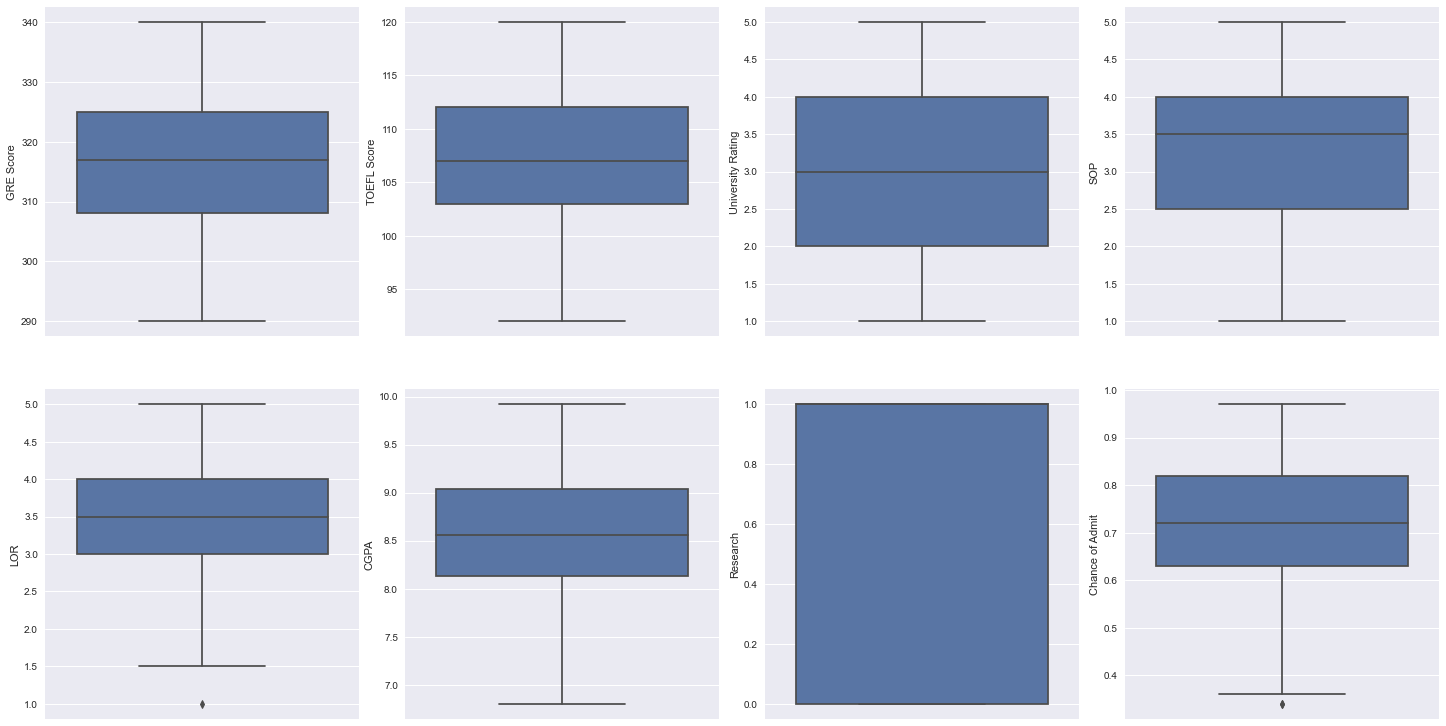

In [32]:
# Finding Outliers

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k, data= dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

plt.show()

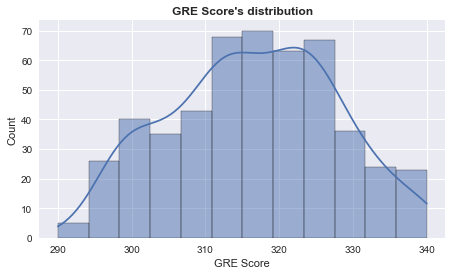

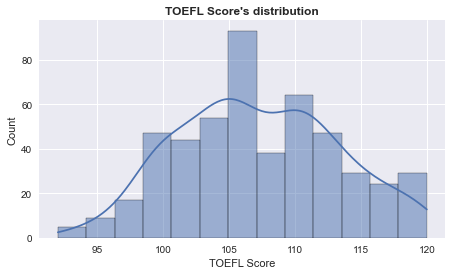

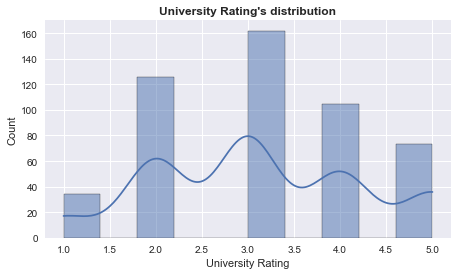

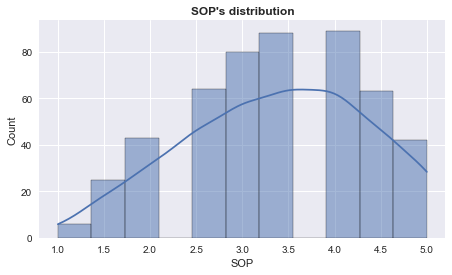

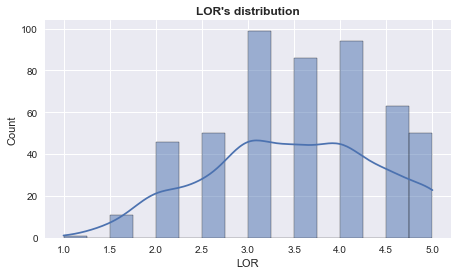

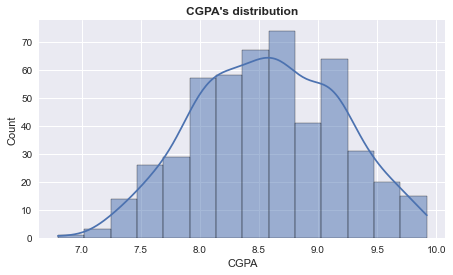

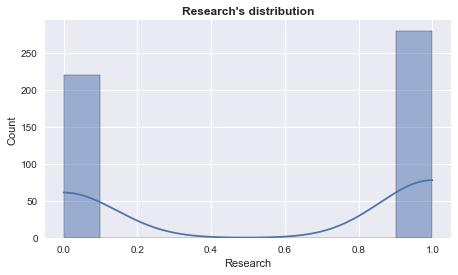

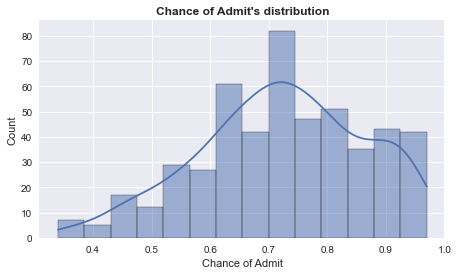

In [43]:
### Checking distribution of  features

for i in dataset.columns:
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    sns.histplot(data=dataset, x=i, kde=True)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    

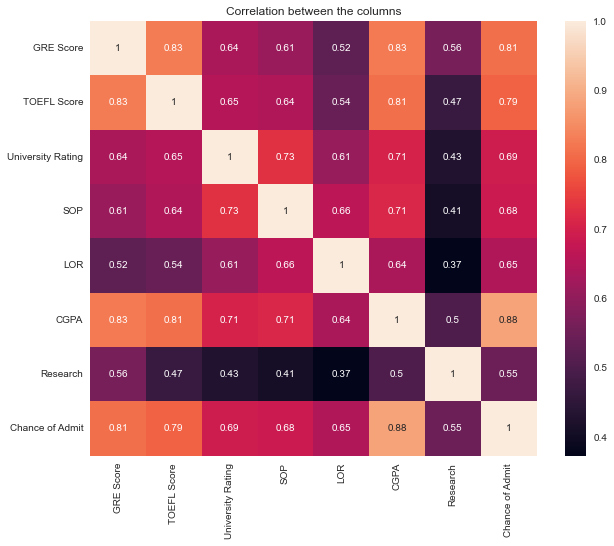

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True)
plt.title("Correlation between the columns")
plt.show()

In [46]:
dataset.corr()['Chance of Admit'].sort_values()

Research             0.545871
LOR                  0.645365
SOP                  0.684137
University Rating    0.690132
TOEFL Score          0.792228
GRE Score            0.810351
CGPA                 0.882413
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

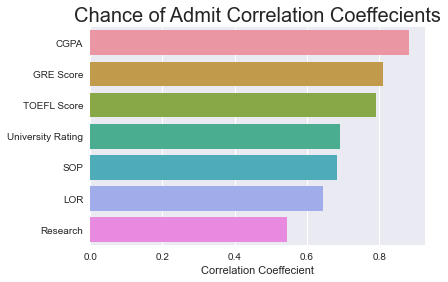

In [72]:
COA_corr = pd.DataFrame(dataset.corr()['Chance of Admit'])
COA_corr.rename({'Chance of Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='20')
plt.show()

In [73]:
COA_corr

,Correlation Coeffecient
CGPA,0.882413
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
Research,0.545871


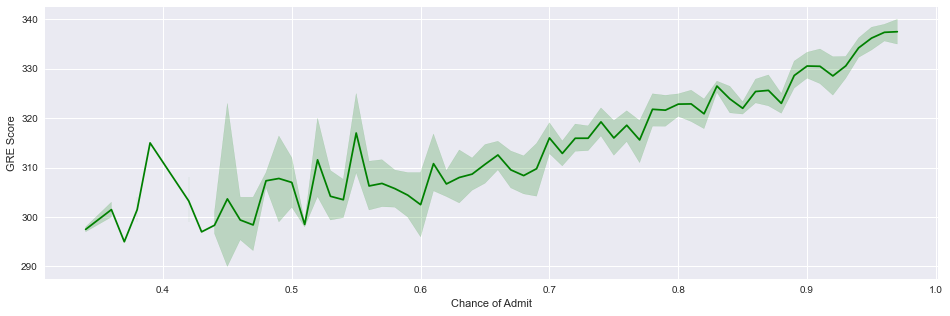

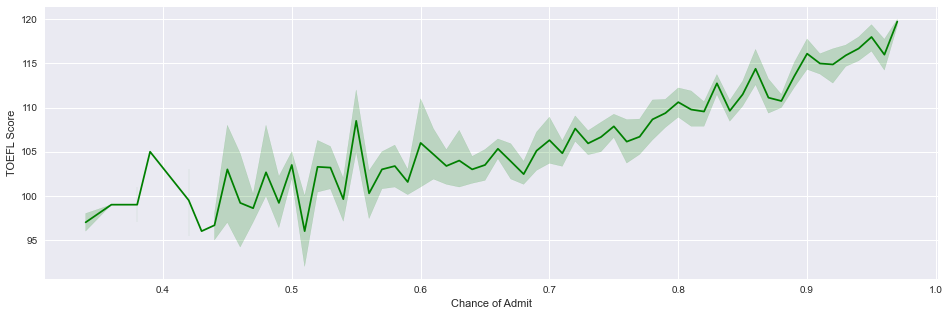

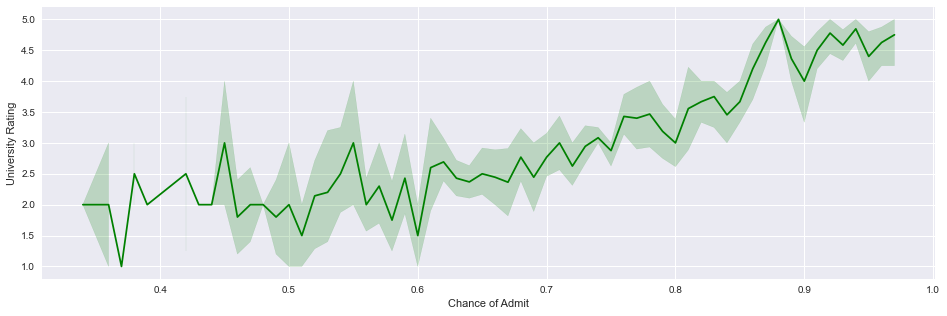

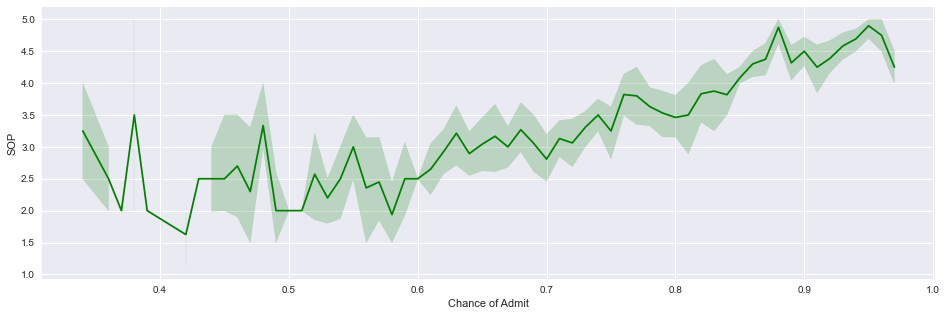

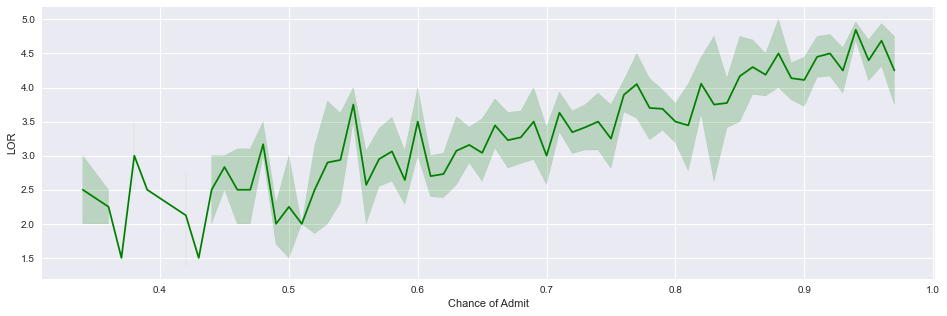

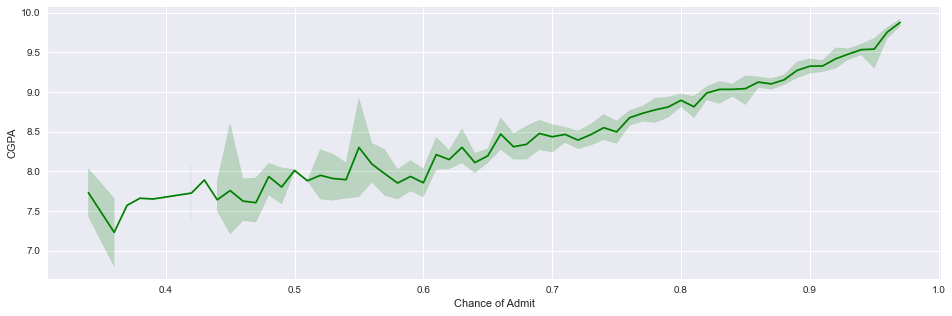

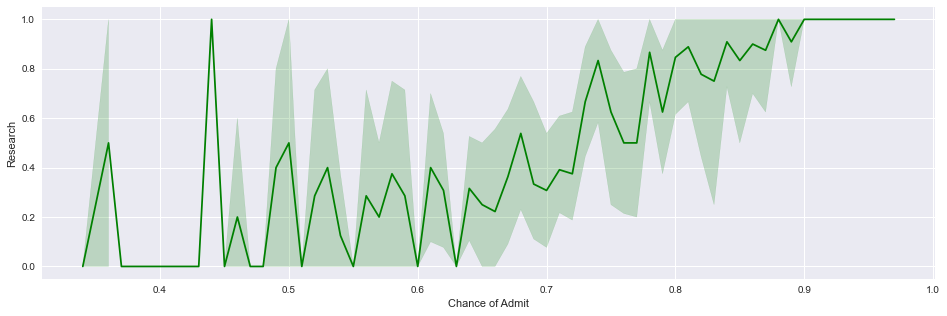

In [51]:
# Finding Relation between Chance of Admit and other variables.

dataset_features= dataset.drop(columns = ['Chance of Admit'])

for i in dataset_features:
    plt.subplots(figsize=(16,5))
    sns.lineplot(x= dataset['Chance of Admit'], y= dataset_features[i],color='g')
    plt.show()

### Splitting data into independent and dependent features

In [52]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]


In [53]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [54]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [55]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [56]:
### both X_train, y_train will have same shape


print("Shape of X train dataframe is", X_train.shape)
print("Shape of y train Series is", y_train.shape)

Shape of X train dataframe is (375, 7)
Shape of y train Series is (375,)


In [57]:
### both X_test, y_test will have same shape


print("Shape of X test dataframe is", X_test.shape)
print("Shape of y test Series is", y_test.shape)

Shape of X test dataframe is (125, 7)
Shape of y test Series is (125,)


In [58]:
#Using StandardScaler() Function to Standardize Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Building SVR Model

In [61]:
from sklearn.svm import SVR
svr=SVR()
svr

SVR()

In [62]:
svr.fit(X_train,y_train)

SVR()

In [63]:
svr_pred=svr.predict(X_test)
svr_pred

array([0.87384111, 0.86989245, 0.6483191 , 0.85258199, 0.69521173,
       0.730401  , 0.61898888, 0.83574342, 0.57006122, 0.73250643,
       0.86732078, 0.8088954 , 0.84022458, 0.65438345, 0.77670578,
       0.72955967, 0.68895912, 0.74610136, 0.74278157, 0.5949036 ,
       0.73017046, 0.60844805, 0.5621504 , 0.86096489, 0.48400717,
       0.87646273, 0.72094657, 0.54337491, 0.65367836, 0.68497729,
       0.88996606, 0.73974269, 0.5779345 , 0.62731646, 0.69346289,
       0.86029064, 0.80094606, 0.63580386, 0.6410657 , 0.68369165,
       0.8663892 , 0.56477019, 0.66681909, 0.87963573, 0.84776595,
       0.47817344, 0.52568108, 0.64308296, 0.76745864, 0.71835538,
       0.78145907, 0.68289374, 0.53090984, 0.57395308, 0.6235117 ,
       0.77570982, 0.83727292, 0.58243295, 0.68839315, 0.87789667,
       0.59778602, 0.82751531, 0.71017035, 0.48565134, 0.82166564,
       0.49070974, 0.67381794, 0.70346997, 0.51366964, 0.67775156,
       0.89838806, 0.51503085, 0.53191261, 0.72005   , 0.66677

In [68]:
svr_r2_score=r2_score(y_test, svr_pred)
print("Our Support Vector Regressor model has {} % accuracy".format(round(svr_r2_score*100,3)))

Our Support Vector Regressor model has 72.098 % accuracy


In [70]:
adjusted_r2_score=1-((1-svr_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R square accuracy is {} % ".format(round(adjusted_r2_score*100,3)))

Adjusted R square accuracy is 70.429 % 
